In [2]:
import pandas as pd
import numpy as np

In [3]:
#Data can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
#Save data as a csv file
original_data = pd.read_csv(
    "data/adult.csv",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
        "Occupation", "Relationship", "Race", "Gender", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
original_data.shape[1]

15

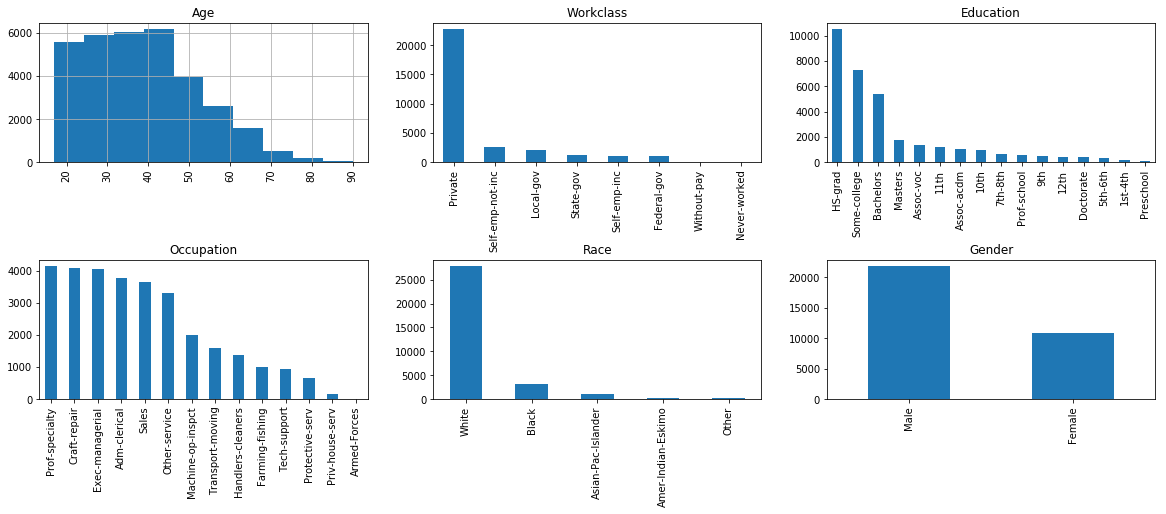

In [3]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig = plt.figure(figsize=(20,20))
cols = 3
rows = math.ceil(float(original_data.shape[1]) / cols)

for i, column in enumerate(['Age', 'Workclass', 'Education', 'Occupation', 'Race', 'Gender']):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [4]:
# Use LabelEncoder to transform text to numbers
import sklearn.preprocessing as preprocessing

le = preprocessing.LabelEncoder()
original_data['Occupation'] = le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
original_data['Target'] = le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


In [6]:
original_data.Target.unique()

array([0, 1])

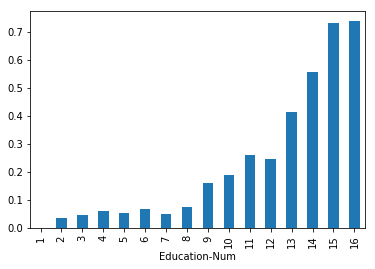

In [7]:
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = original_data[['Education-Num', 'Occupation']]

y = original_data['Target']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.svm import SVC   

# Declaring the SVC with no tuning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)

# Predicting the result and giving the accuracy
score = classifier.score(x_test, y_test)

print(score)

0.787194841087


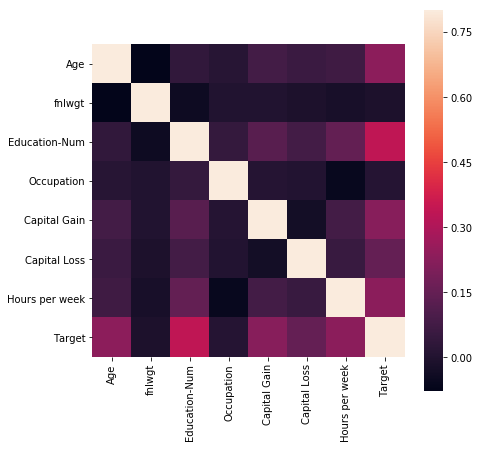

In [10]:
# Correlation matrix
import seaborn as sns

corrmat = original_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
#Only fields with numeric values will show up in correlation matrix

In [11]:
# Convert potential relevant fields to have numeric values
original_data['Race'] = le.fit_transform(original_data['Race'].astype(str))
original_data['Gender'] = le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital Status'] = le.fit_transform(original_data['Marital Status'].astype(str))
original_data['Education'] = le.fit_transform(original_data['Education'].astype(str))

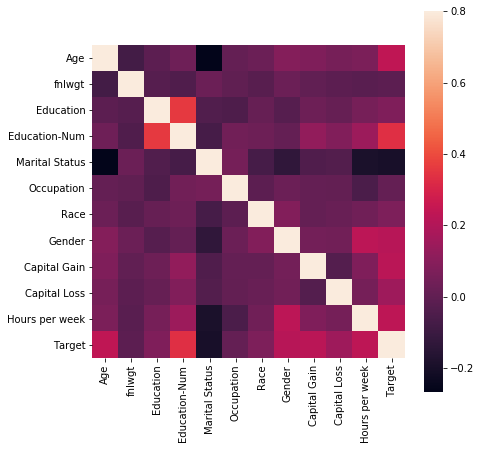

In [12]:
corrmat = original_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

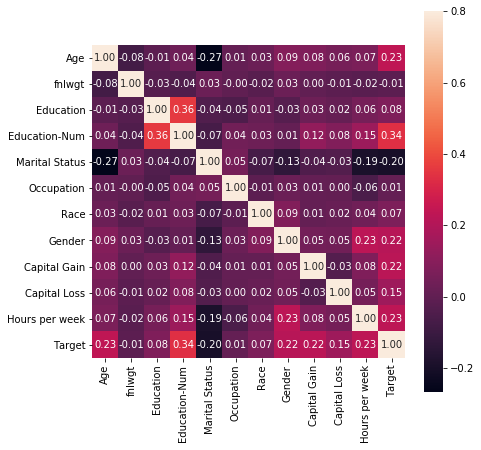

In [13]:
# To get the actual correlation values, annotate the heatmap
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

In [16]:
# Resetting features
X = original_data[['Education-Num', 'Occupation', 'Age', 'Gender']]
y = original_data['Target']

#Splitting training and test data
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = SVC()

classifier.fit(X_train, y_train)

score = classifier.score(x_test, y_test)
print(score)

0.804544756641


In [17]:
# Setting our kernel to Radial Basis Function with penalty parameter C=1.0
classifier = SVC(kernel='rbf', C=1.0)
classifier.fit(X_train, y_train)

score = classifier.score(x_test, y_test)
print(score)
# kernel='rbf' and C=1.0 are the default values

0.804544756641


In [18]:
# Adjust the penalty parameter C
classifier = SVC(kernel='rbf', C=10.0)
classifier.fit(X_train, y_train)

score = classifier.score(x_test, y_test)
print(score)

0.799477967143


In [19]:
# Let us now try a linear kernel
classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X_train, y_train)

score = classifier.score(x_test, y_test)
print(score)

0.79671426378


In [20]:
# Use LinearSVC alogorithm which should scale better to large numbers of samples
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, y_train)

score = classifier.score(x_test, y_test)
print(score)

0.590664824198
